# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data (train, test, sample submission)

In [2]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Demand Forecasting\\train.csv',parse_dates = [1])
test=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Demand Forecasting\\test.csv',parse_dates = [1])
sub=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Demand Forecasting\\sample_sub.csv')

train.shape, test.shape, sub.shape

((150150, 9), (13860, 8), (13860, 2))

In [3]:
rid = test.record_ID

# Handling Dates

In [4]:
#Train data
train['week']=pd.to_datetime(train.week)

train['year'] = train['week'].dt.year
train['quarter'] = train['week'].dt.quarter
train['month'] = train['week'].dt.month
train['date'] = train['week'].dt.day
train['week_day'] = train['week'].dt.dayofweek
train['is_weekend'] = np.where(train['week_day'].isin([5, 6]), 1, 0)
#train['is_weekday'] = np.where(train['week_day'].isin([0, 1, 2, 3, 4]), 1, 0)

train.tail()

#Test data
test['week']=pd.to_datetime(test.week)

test['year'] = test['week'].dt.year
test['quarter'] = test['week'].dt.quarter
test['month'] = test['week'].dt.month
test['date'] = test['week'].dt.day
test['week_day'] = test['week'].dt.dayofweek
test['is_weekend'] = np.where(test['week_day'].isin([5, 6]), 1, 0)
#test['is_weekday'] = np.where(test['week_day'].isin([0, 1, 2, 3, 4]), 1, 0)



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
 9   year             150150 non-null  int64         
 10  quarter          150150 non-null  int64         
 11  month            150150 non-null  int64         
 12  date             150150 non-null  int64         
 13  week_day         150150 non-null  int64         
 14  is_weekend       150

In [6]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,year,quarter,month,date,week_day,is_weekend
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,2011,1,1,17,0,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2011,1,1,17,0,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2011,1,1,17,0,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,2011,1,1,17,0,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,2011,1,1,17,0,0


# Check 1 :NaN values

In [7]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
year               0
quarter            0
month              0
date               0
week_day           0
is_weekend         0
dtype: int64

Notice that one entry for total_price is null in the train set. Lets replace it with the base_price for now.

In [8]:
temp=train[train['total_price'].isnull()]['base_price']

In [9]:
#Replacing NaN with Baseprice

train['total_price']=train['total_price'].fillna(temp)

In [10]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
year               0
quarter            0
month              0
date               0
week_day           0
is_weekend         0
dtype: int64

#  Number of Stores and SKUs (Train data)

In [11]:
#Distinct Stores in train data
print("Total number of stores : ", train['store_id'].nunique())

#Distinct SKUs in train data
print("Total number of SKUs : ", train['sku_id'].nunique())

#Combining of store_id and sku_id
store_sku_train = (train['store_id'].astype(str) + "_" + train['sku_id'].astype(str)).unique()

#Distinct Store-SKU combinations in train data
print("There are", len(store_sku_train), "store-product pairs in train data")

Total number of stores :  76
Total number of SKUs :  28
There are 1155 store-product pairs in train data


# Stores and SKUs in Test data

In [12]:
store_sku_test = (test['store_id'].astype(str) + "_" + test['sku_id'].astype(str)).unique()
print("There are", len(store_sku_test), "store-product pairs in test data")

There are 1155 store-product pairs in test data


# Checking any new combination in  test data

In [13]:
# check if test set has any new center-mean pair or not
print("There are",len(set(store_sku_test) - set(store_sku_train)), "pairs in test data which are not present in train data")
print(set(store_sku_test) - set(store_sku_train))

There are 0 pairs in test data which are not present in train data
set()


# Sales in weekly Time series

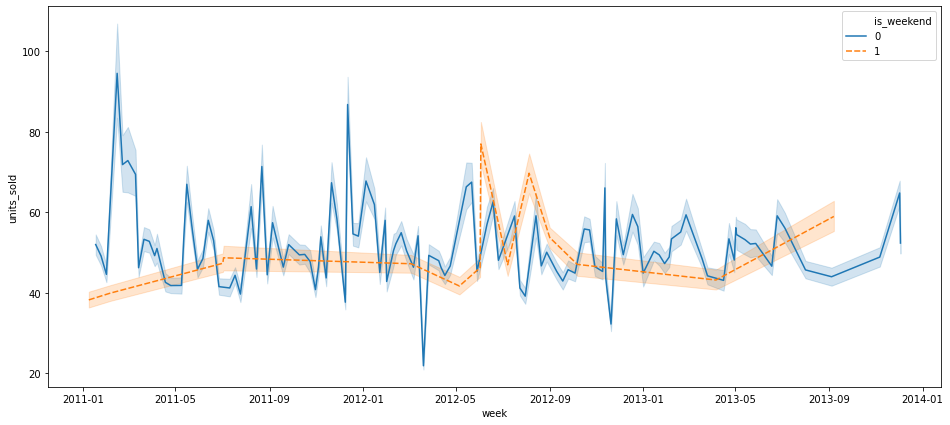

In [14]:
plt.figure(figsize = (16, 7))
sns.lineplot(data=train, x="week", y="units_sold",hue='is_weekend',style='is_weekend')

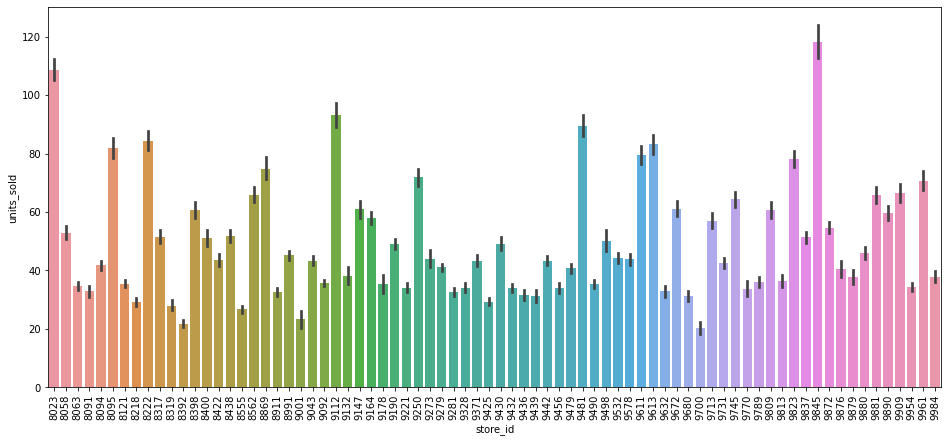

In [15]:
plt.figure(figsize = (16, 7))
sns.barplot(train['store_id'], train['units_sold'])
plt.xticks(rotation = 90)
plt.show()

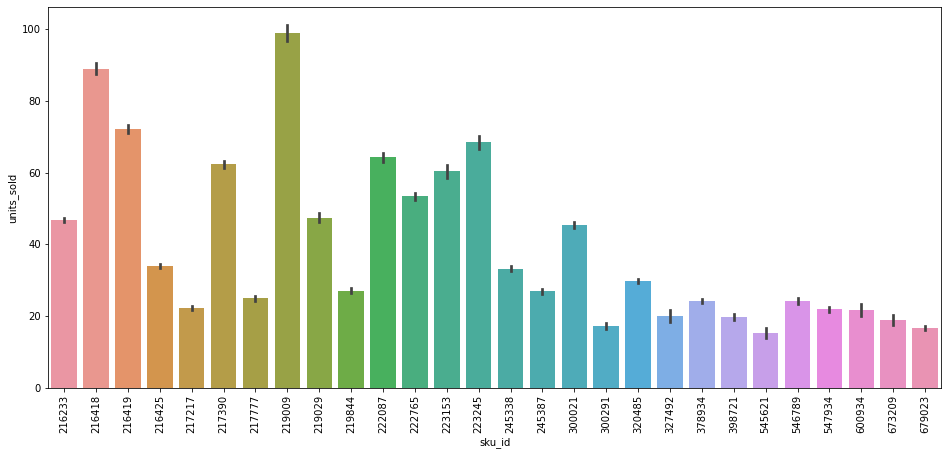

In [16]:
plt.figure(figsize = (16, 7))
sns.barplot(train['sku_id'], train['units_sold'])
plt.xticks(rotation = '90')
plt.show()

# Outliers in target

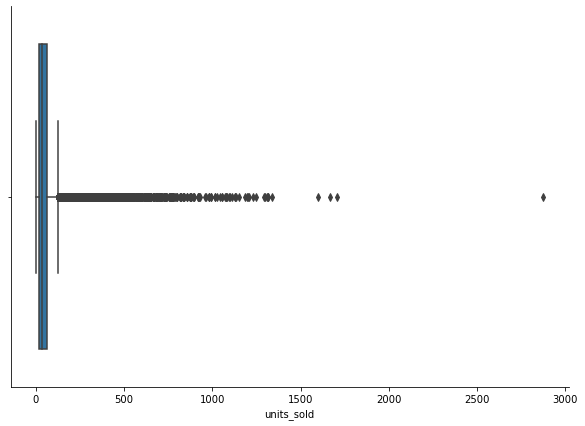

In [17]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'units_sold', data = train)
sns.despine()

Total Price vs target


<Figure size 1440x504 with 0 Axes>

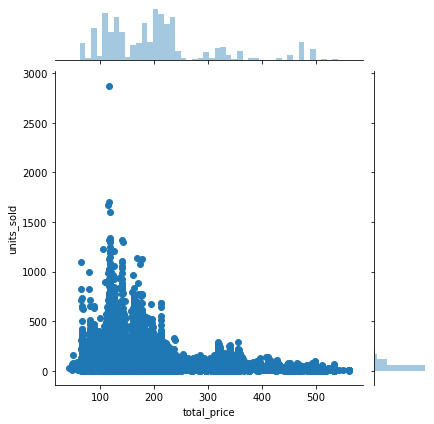

Base Price vs target


<Figure size 1152x504 with 0 Axes>

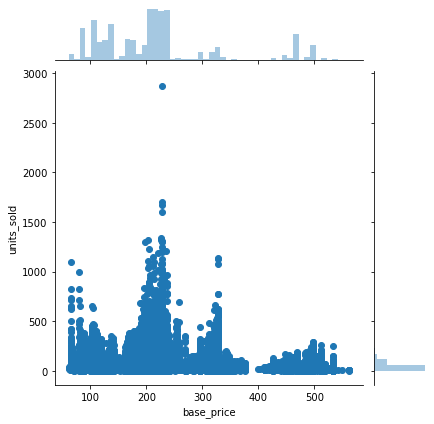

SKU_ID vs target


<Figure size 1440x504 with 0 Axes>

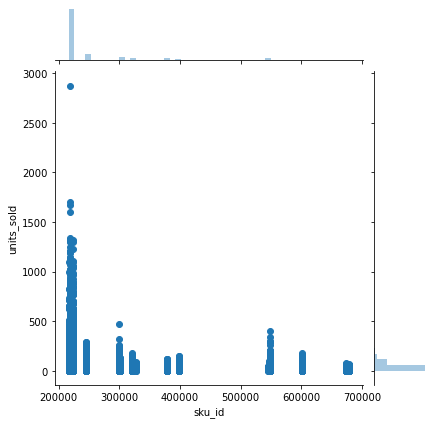

Store_ID vs target


<Figure size 1152x504 with 0 Axes>

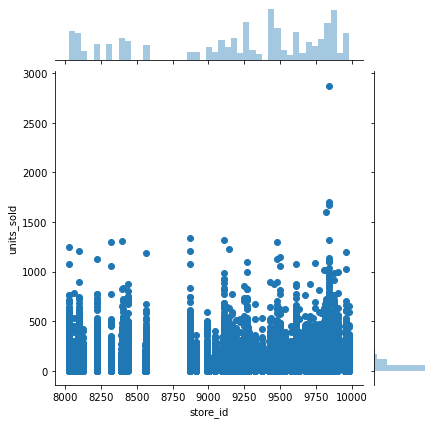

In [18]:
#Total Price vs target
print("Total Price vs target")
plt.figure(figsize = (20, 7))
sns.jointplot(x = 'total_price', y = 'units_sold', data = train)
plt.show()

#Base Price vs target
print("Base Price vs target")
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'base_price', y = 'units_sold', data = train)
plt.show()

#SKU_ID vs target
print("SKU_ID vs target")
plt.figure(figsize = (20, 7))
sns.jointplot(x = 'sku_id', y = 'units_sold', data = train)
plt.show()

#Store_ID vs target
print("Store_ID vs target")
plt.figure(figsize = (16, 7))
sns.jointplot(x = 'store_id', y = 'units_sold', data = train)

# Remove outlier

In [19]:
outlier_index = train[(train['units_sold'] > 1500)].index
train.drop(outlier_index, inplace = True)

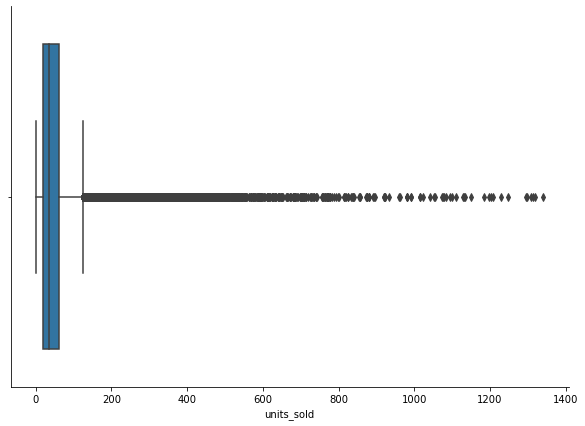

In [20]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'units_sold', data = train)
sns.despine()

# Correlations

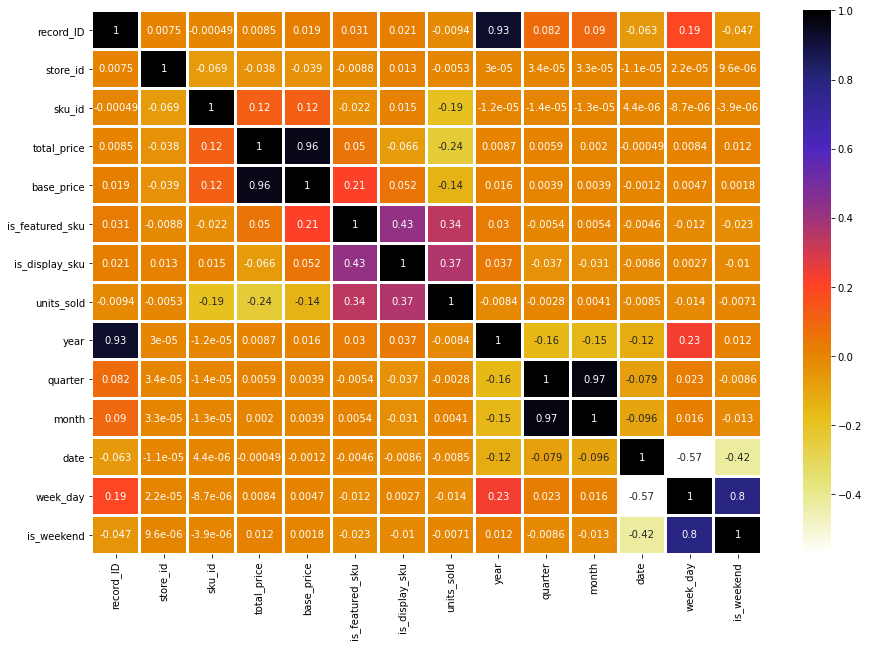

In [21]:
#Pearson Corellation

plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.CMRmap_r,linewidths=2)

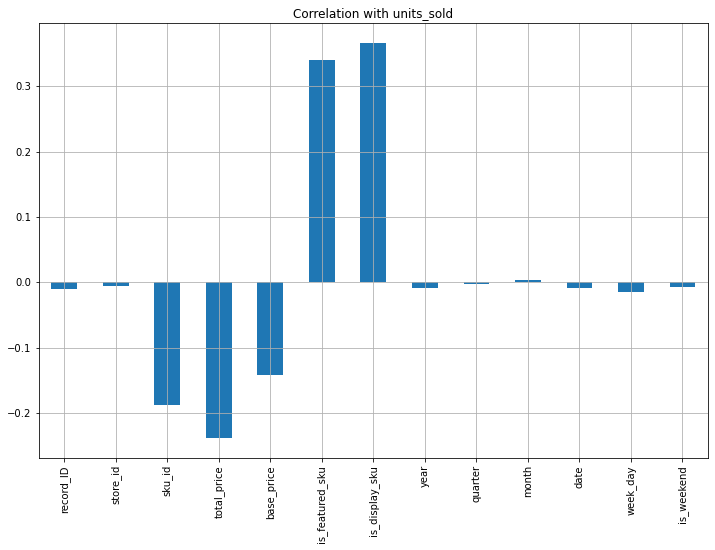

In [22]:
train.drop('units_sold', axis=1).corrwith(train.units_sold).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with units_sold")

In [23]:
cols_to_drop=['record_ID','week']
#train
train=train.drop(cols_to_drop,axis=1)
#test
test=test.drop(cols_to_drop,axis=1)

# Feature Engineering 1 (Dummy for categorical features)

In [24]:
#dataset = pd.get_dummies(train, columns = ['is_featured_sku', 'is_display_sku'])
#dataset.head()

# Feature-Target split

In [25]:
X = train.drop(['units_sold'], axis = 1)
y = train['units_sold']
X.shape, y.shape

((150146, 12), (150146,))

In [26]:
X.head(2)

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,year,quarter,month,date,week_day,is_weekend
0,8091,216418,99.0375,111.8625,0,0,2011,1,1,17,0,0
1,8091,216419,99.0375,99.0375,0,0,2011,1,1,17,0,0


# Feature Engineering 2 (Scaling)

SCALING IS NOT NEEDED IN DECISION TREE/ RANDOM FOREST / XGBOOST


In [27]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
#dataset.head()
#cols=['store_id','sku_id','total_price','base_price']
#X[cols]=sc.fit_transform(X[cols])
#X.head()

# Train -Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=10)

# Training Model 1 : Decision Tree Regressor + Error

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error

Tuning Model

In [36]:
def get_msle(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=5100, min_samples_split=each, random_state=0)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    msle = mean_squared_log_error( pred,y_test)
    return msle

In [33]:
# compare MAE with differing values of max_leaf_nodes

for each in [28, 30, 32]:
    my_msle = get_msle(each, X_train,X_test, y_train, y_test)
    print("%d  \t\t Mean Squared Log Error:  %f" %(each, my_msle))

28  		 Mean Squared Log Error:  0.216019
30  		 Mean Squared Log Error:  0.214806
32  		 Mean Squared Log Error:  0.213330


Final Model

In [42]:
model = DecisionTreeRegressor(max_leaf_nodes=5100, min_samples_split=32, random_state=0)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=5100, min_samples_split=32, random_state=0)

# Training Model 2 : Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

Tuning Model

In [44]:
#for each in [270, 300]:
model_2 = RandomForestRegressor(n_estimators=30, max_leaf_nodes = 16000, random_state=1)
model_2.fit(X_train,y_train)
pred_2 = model_2.predict(X_test)
print(mean_squared_log_error(y_test, pred_2))

0.17731810504781345


Final Model

In [45]:
model_2 = RandomForestRegressor(n_estimators=30, max_leaf_nodes = 16000, random_state=1)
model_2.fit(X, y)

RandomForestRegressor(max_leaf_nodes=16000, n_estimators=30, random_state=1)

# Precting Test Data

In [46]:
# predict using decision tree
f = 0
preds0 = model.predict(test)


In [47]:
# predict using random forest
f = 1
preds1 = model_2.predict(test)


# Exporting Test Data

In [49]:
subm = pd.DataFrame()
subm['record_ID'] = rid
subm['units_sold'] = preds

if f==0:
    subm.to_csv("C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Demand Forecasting\\submission_dt.csv", index=None)
elif f==1:
    subm.to_csv("C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\Demand Forecasting\\submission_rf.csv", index=None)
#elif f==2:
 #  subm.to_csv("xgb/submission_xgb.csv", index=None)

NameError: name 'preds' is not defined